In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy import stats

print("=" * 50)
print("ЛИНЕЙНАЯ РЕГРЕССИЯ: ЗАВИСИМОСТЬ ВЕСА ОТ РОСТА")
print("=" * 50)

np.random.seed(42)
n = 500

# Генерация данных согласно заданию
X_linear = np.random.normal(0, 1, n)  # Рост (стандартизированный)
eps_linear = np.random.normal(0, 1, n)  # Случайная ошибка
Y_linear = 15 * X_linear - 17 + eps_linear  # Вес

# Создаем таблицу
data_linear = pd.DataFrame({
    'Рост': X_linear,
    'Вес': Y_linear
})

print("Первые 10 строк таблицы:")
print(data_linear.head(10))


ЛИНЕЙНАЯ РЕГРЕССИЯ: ЗАВИСИМОСТЬ ВЕСА ОТ РОСТА
Первые 10 строк таблицы:
       Рост        Вес
0  0.496714  -8.623110
1 -0.138264 -17.164548
2  0.647689  -8.683240
3  1.523030   6.408417
4 -0.234153 -21.162943
5 -0.234137 -20.999180
6  1.579213   6.095798
7  0.767435  -6.352470
8 -0.469474 -23.993594
9  0.542560  -9.692549


In [92]:
# 2. Построение модели простой линейной регрессии БЕЗ использования встроенных функций
print("=" * 50)
print("РАСЧЕТ ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ ВРУЧНУЮ")
print("=" * 50)

# Вычисляем параметры регрессии по формулам из лекции
X_mean = np.mean(X_linear)
y_mean = np.mean(Y_linear)

# Вычисляем beta1 (наклон)
numerator = np.sum((X_linear - X_mean) * (Y_linear - y_mean))
denominator = np.sum((X_linear - X_mean) ** 2)
beta1 = numerator / denominator

# Вычисляем beta0 (свободный член)
beta0 = y_mean - beta1 * X_mean

print(f"Рассчитанные параметры линейной регрессии:")
print(f"β0 (свободный член) = {beta0:.4f}")
print(f"β1 (наклон) = {beta1:.4f}")
print(f"Исходные параметры модели: β0 = -17, β1 = 15")

# Прогнозные значения
Y_pred_linear = beta0 + beta1 * X_linear

# 3. Вычисление статистик качества модели
print("=" * 50)
print("СТАТИСТИКИ КАЧЕСТВА ЛИНЕЙНОЙ МОДЕЛИ")
print("=" * 50)

# Сумма квадратов остатков (RSS)
RSS = np.sum((Y_linear - Y_pred_linear) ** 2)

# Общая сумма квадратов (TSS)
TSS = np.sum((Y_linear - y_mean) ** 2)

# Стандартная ошибка остатков (RSE)
RSE = np.sqrt(RSS / (n - 2))

# Коэффициент детерминации R²
R_squared = 1 - RSS / TSS

# Коэффициент корреляции Пирсона
correlation = numerator / np.sqrt(denominator * np.sum((Y_linear - y_mean) ** 2))

print(f"Сумма квадратов остатков (RSS): {RSS:.4f}")
print(f"Общая сумма квадратов (TSS): {TSS:.4f}")
print(f"Стандартная ошибка остатков (RSE): {RSE:.4f}")
print(f"Коэффициент детерминации R²: {R_squared:.4f}")
print(f"Квадрат коэффициента корреляции: {correlation**2:.4f}")
print(f"Коэффициент корреляции Пирсона: {correlation:.4f}")


РАСЧЕТ ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ ВРУЧНУЮ
Рассчитанные параметры линейной регрессии:
β0 (свободный член) = -16.9677
β1 (наклон) = 14.9246
Исходные параметры модели: β0 = -17, β1 = 15
СТАТИСТИКИ КАЧЕСТВА ЛИНЕЙНОЙ МОДЕЛИ
Сумма квадратов остатков (RSS): 474.5498
Общая сумма квадратов (TSS): 107495.0599
Стандартная ошибка остатков (RSE): 0.9762
Коэффициент детерминации R²: 0.9956
Квадрат коэффициента корреляции: 0.9956
Коэффициент корреляции Пирсона: 0.9978


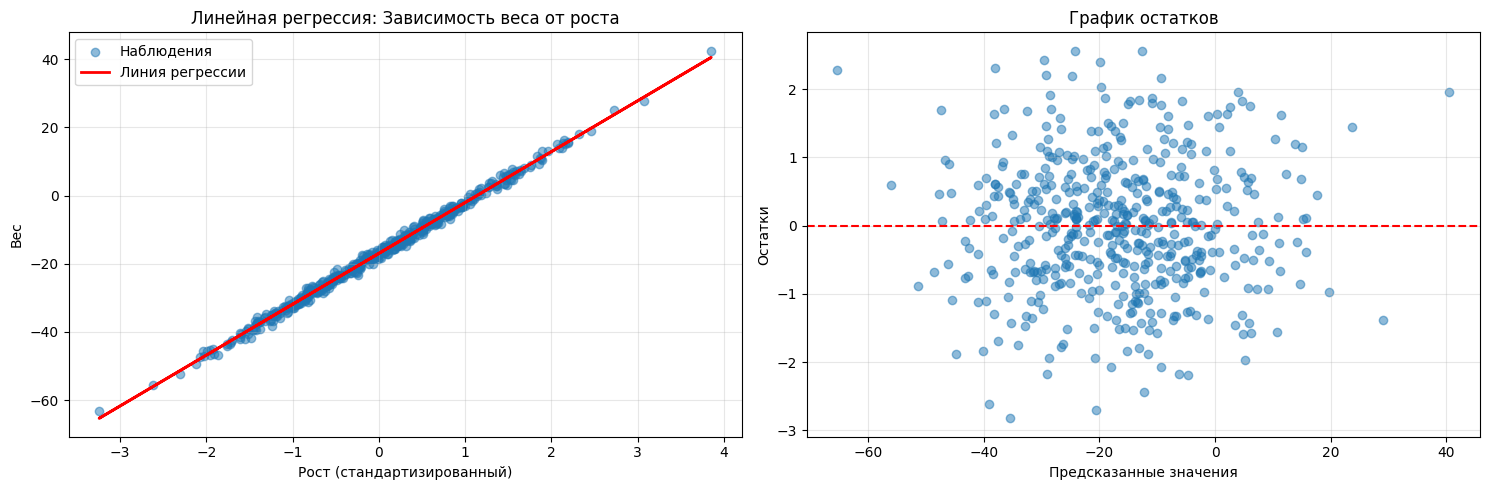

In [93]:
# Визуализация линейной регрессии
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_linear, Y_linear, alpha=0.5, label='Наблюдения')
plt.plot(X_linear, Y_pred_linear, color='red', linewidth=2, label='Линия регрессии')
plt.xlabel('Рост (стандартизированный)')
plt.ylabel('Вес')
plt.title('Линейная регрессия: Зависимость веса от роста')
plt.legend()
plt.grid(True, alpha=0.3)

# График остатков
plt.subplot(1, 2, 2)
residuals = Y_linear - Y_pred_linear
plt.scatter(Y_pred_linear, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [94]:
# 4. Мультипликативная модель регрессии
print("=" * 50)
print("МУЛЬТИПЛИКАТИВНАЯ МОДЕЛЬ РЕГРЕССИИ")
print("=" * 50)

# Используем те же линейные данные для возраста/веса
age = 30 + 15 * X_linear  # Возраст
age = np.clip(age, 1, 70)  # Положительный
weight_mult = Y_linear + 70  # Вес positive

# Таблица
data_mult = pd.DataFrame({
    'Возраст': age,
    'Вес': weight_mult
})

print("Первые 10 строк таблицы (мультипликативная модель):")
print(data_mult.head(10))

# Фит мультипликативной: weight = a * age^b * exp(eps)
ln_X = np.log(age)
ln_Y = np.log(weight_mult)
ln_x_mean = np.mean(ln_X)
ln_y_mean = np.mean(ln_Y)
Sxx = np.sum((ln_X - ln_x_mean)**2)
Sxy = np.sum((ln_X - ln_x_mean)*(ln_Y - ln_y_mean))
b_hat = Sxy / Sxx
ln_a_hat = ln_y_mean - b_hat * ln_x_mean
a_hat = np.exp(ln_a_hat)

ln_Y_hat = ln_a_hat + b_hat * ln_X
resid = ln_Y - ln_Y_hat

RSS_mult = np.sum(resid**2)
TSS_mult = np.sum((ln_Y - ln_y_mean)**2)
R_squared_mult = 1 - RSS_mult / TSS_mult
RSE_mult = sqrt(RSS_mult / (n - 2))
sigma2_hat = RSS_mult / (n - 2)
se_b = sqrt(sigma2_hat / Sxx)
se_ln_a = sqrt(sigma2_hat * (1/n + ln_x_mean**2 / Sxx))

print(f"\nПараметры мультипликативной модели:")
print(f"Оценка a: {a_hat:.4f}")
print(f"Оценка b: {b_hat:.4f}")

print(f"\nСтатистики качества мультипликативной модели:")
print(f"R²: {R_squared_mult:.4f}")
print(f"RSS: {RSS_mult:.4f}")


МУЛЬТИПЛИКАТИВНАЯ МОДЕЛЬ РЕГРЕССИИ
Первые 10 строк таблицы (мультипликативная модель):
     Возраст        Вес
0  37.450712  61.376890
1  27.926035  52.835452
2  39.715328  61.316760
3  52.845448  76.408417
4  26.487699  48.837057
5  26.487946  49.000820
6  53.688192  76.095798
7  41.511521  63.647530
8  22.957884  46.006406
9  38.138401  60.307451

Параметры мультипликативной модели:
Оценка a: 14.4512
Оценка b: 0.3905

Статистики качества мультипликативной модели:
R²: 0.8910
RSS: 5.0878


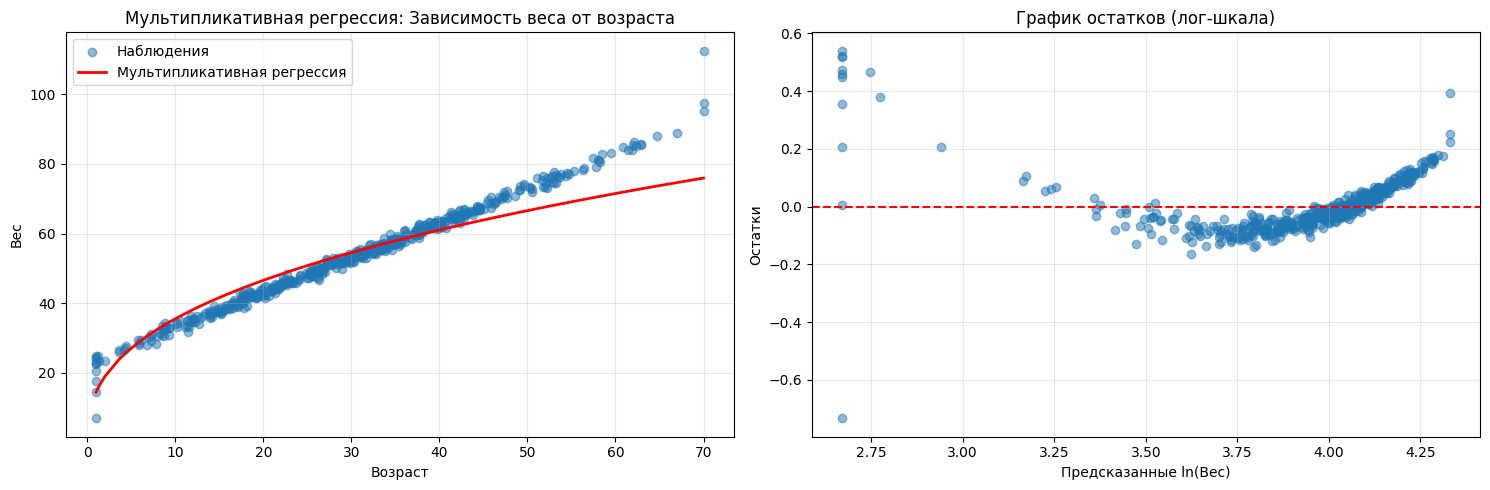

In [95]:
# Визуализация мультипликативной модели
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(age, weight_mult, alpha=0.5, label='Наблюдения')
sort_idx = np.argsort(age)
x_plot = age[sort_idx]
y_fit = a_hat * (x_plot ** b_hat)
plt.plot(x_plot, y_fit, color='red', linewidth=2, label='Мультипликативная регрессия')
plt.xlabel('Возраст')
plt.ylabel('Вес')
plt.title('Мультипликативная регрессия: Зависимость веса от возраста')
plt.legend()
plt.grid(True, alpha=0.3)

# График остатков в лог-шкале
plt.subplot(1, 2, 2)
plt.scatter(ln_Y_hat, resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные ln(Вес)')
plt.ylabel('Остатки')
plt.title('График остатков (лог-шкала)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [96]:
# Сравнительный анализ моделей
print("=" * 50)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ")
print("=" * 50)

print("ЛИНЕЙНАЯ МОДЕЛЬ:")
print(f"  • R² = {R_squared:.4f}")
print(f"  • RSS = {RSS:.4f}")
print(f"  • Параметры: β0 = {beta0:.4f}, β1 = {beta1:.4f}")

print("\nМУЛЬТИПЛИКАТИВНАЯ МОДЕЛЬ:")
print(f"  • R² = {R_squared_mult:.4f}")
print(f"  • RSS = {RSS_mult:.4f}")
print(f"  • Параметры: a = {a_hat:.4f}, b = {b_hat:.4f}")

СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ
ЛИНЕЙНАЯ МОДЕЛЬ:
  • R² = 0.9956
  • RSS = 474.5498
  • Параметры: β0 = -16.9677, β1 = 14.9246

МУЛЬТИПЛИКАТИВНАЯ МОДЕЛЬ:
  • R² = 0.8910
  • RSS = 5.0878
  • Параметры: a = 14.4512, b = 0.3905


In [97]:
# Интерпретация параметров
print("="*50)
print("ИНТЕРПРЕТАЦИЯ ПАРАМЕТРОВ МУЛЬТИПЛИКАТИВНОЙ МОДЕЛИ")
print("="*50)

print(f"Параметры модели: a = {a_hat:.4f}, b = {b_hat:.4f}")
print(f"\nМодель: Вес = {a_hat:.2f} × Возраст^{b_hat:.2f}")

# Расчет для конкретных возрастов
ages_example = [20, 30, 40, 50, 60]
print(f"\nПрогноз веса для разных возрастов:")
for age in ages_example:
    predicted_weight = a_hat * (age ** b_hat)
    print(f"Возраст {age} лет: прогнозируемый вес {predicted_weight:.1f} кг")

ИНТЕРПРЕТАЦИЯ ПАРАМЕТРОВ МУЛЬТИПЛИКАТИВНОЙ МОДЕЛИ
Параметры модели: a = 14.4512, b = 0.3905

Модель: Вес = 14.45 × Возраст^0.39

Прогноз веса для разных возрастов:
Возраст 20 лет: прогнозируемый вес 46.6 кг
Возраст 30 лет: прогнозируемый вес 54.5 кг
Возраст 40 лет: прогнозируемый вес 61.0 кг
Возраст 50 лет: прогнозируемый вес 66.6 кг
Возраст 60 лет: прогнозируемый вес 71.5 кг
